In [1]:
import os
from pathlib import Path

cur_path = Path(os.getcwd())
parent_dir = str(cur_path.parent.absolute())

os.chdir(parent_dir)

In [2]:
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt

In [3]:
from Detection.CV_mix_DL import cv_mix_dl_detector

In [4]:
# some configs
enemy_team = 'blue' # 'blue' or 'red'
test_img_path = os.path.join(os.getcwd(), 'examples', 'test_2.jpg')

In [5]:
my_detector = cv_mix_dl_detector(enemy_team)

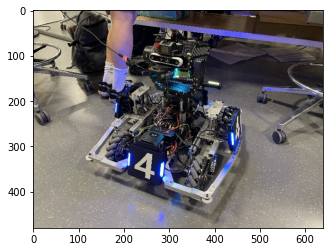

In [6]:
# By default, OpenCV reads in images in BGR format
test_img_bgr = cv2.imread(test_img_path)
test_img_bgr = cv2.resize(test_img_bgr, (640, 480))
test_img_rgb = cv2.cvtColor(test_img_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(test_img_rgb)

In [7]:
results = my_detector.detect(test_img_bgr)
print(results)

[('armor_blue', array([0.99988425], dtype=float32), (247.8237762451172, 339.68853759765625, 76.31614853691617, 29.662681302424247))]


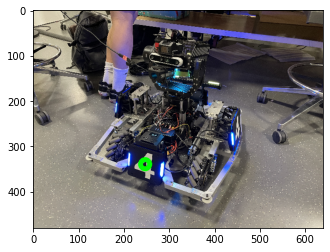

In [8]:
show_frame = test_img_rgb.copy()

for obj_name, confidence, bbox in results:
    center_x, center_y, width, height = bbox
    cv2.circle(show_frame, (int(center_x), int(center_y)), 10, (0, 255, 0), 10)

plt.imshow(show_frame)

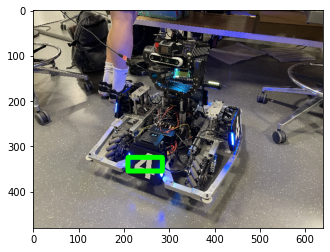

In [9]:
show_frame = test_img_rgb.copy()

for obj_name, confidence, bbox in results:
    center_x, center_y, width, height = bbox
    lower_x = int(center_x - width / 2)
    lower_y = int(center_y - height / 2)
    upper_x = int(center_x + width / 2)
    upper_y = int(center_y + height / 2)
    cv2.rectangle(show_frame, (lower_x, lower_y), (upper_x, upper_y), (0, 255, 0), 10)

plt.imshow(show_frame)